## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

pd.set_option("display.max_columns", 900)
plt.style.use("ggplot")

### Load Data

In [2]:
df = pd.read_csv("../input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Data Analysis

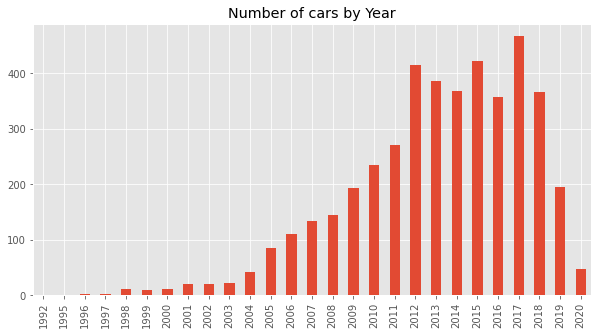

In [3]:
df["year"].value_counts().sort_index().plot(
    kind="bar", title="Number of cars by Year", figsize=(10, 5)
)
plt.show()

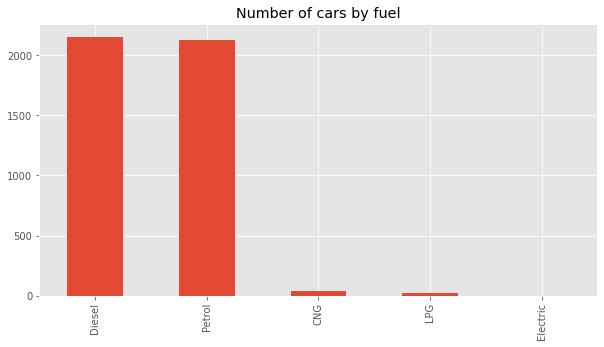

In [4]:
df["fuel"].value_counts().plot(
    kind="bar", title="Number of cars by fuel", figsize=(10, 5)
)
plt.show()

In [5]:
df["fuel"].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

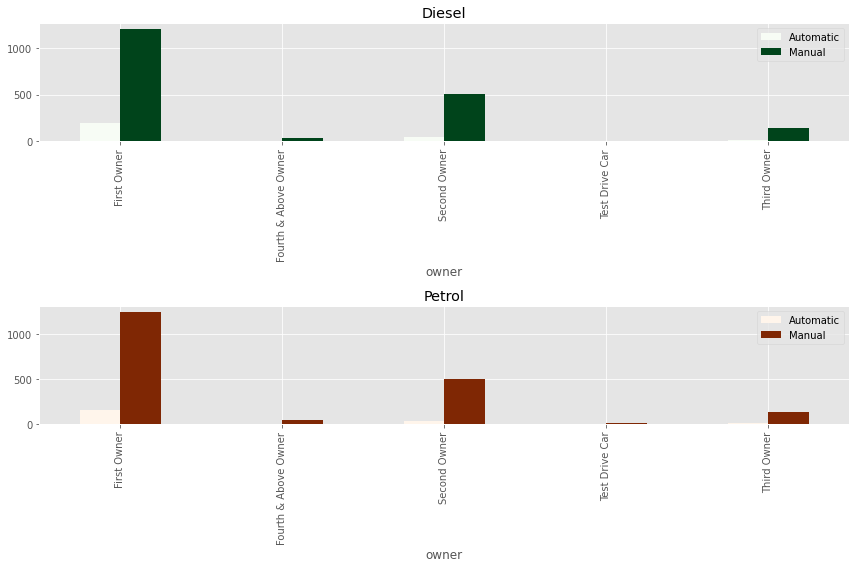

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
ax = (
    df.query('fuel == "Diesel"')
    .groupby(['owner',"transmission"])
    .size()
    .unstack()
    .sort_index(ascending=True)
    .plot(
        kind="bar",
        stacked=False,
        cmap="Greens",
        title="Diesel",
        ax=axs[0],
    )
)
axs[0].legend(bbox_to_anchor=(1, 1))

ax = (
    df.query('fuel == "Petrol"')
    .groupby(['owner',"transmission"])
    .size()
    .unstack()
    .sort_index(ascending=True)
    .plot(
        kind="bar",
        stacked=False,
        cmap="Oranges",
        title="Petrol",
        ax=axs[1],
    )
)
axs[1].legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


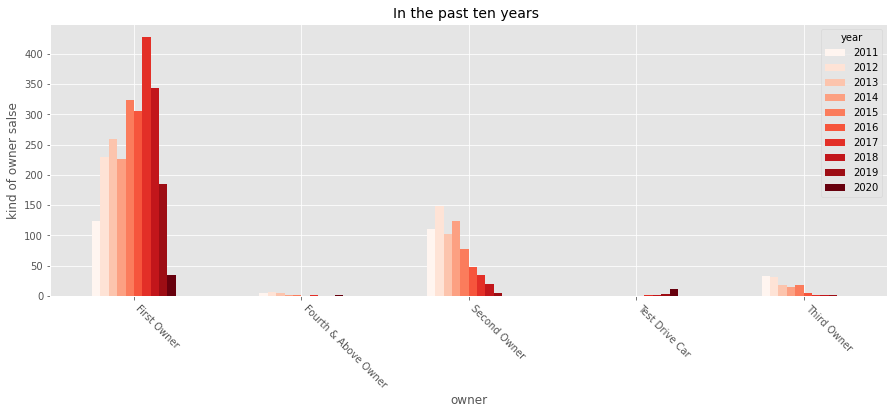

In [7]:
df_owner = df.query('year > 2010')
df_owner = (
    df_owner.groupby("year")["owner"]
    .value_counts()
    .sort_index()
    .unstack()
)
ax = df_owner.T.plot(kind="bar", figsize=(15, 5), cmap="Reds")
ax.set_title("In the past ten years ", fontsize=14)
ax.set_ylabel("kind of owner salse")
plt.xticks(rotation=-45, ha="left")
plt.show()

### Owner

In [8]:
df.groupby("year")["owner"].value_counts().unstack().fillna(0).astype(
    "int"
).style.background_gradient(cmap="Greens")

owner,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
year,,,,,
1992,0,1,0,0,0
1995,0,0,1,0,0
1996,1,0,1,0,0
1997,1,0,1,0,1
1998,0,3,6,0,3
1999,1,3,5,0,1
2000,4,2,4,0,2
2001,5,1,6,0,8
2002,7,3,6,0,5


### seller_type

In [9]:
df.groupby("year")["seller_type"].value_counts().unstack().fillna(0).astype(
    "int"
).style.background_gradient(cmap="Greens")

seller_type,Dealer,Individual,Trustmark Dealer
year,,,
1992,0,1,0
1995,0,1,0
1996,0,2,0
1997,0,3,0
1998,1,11,0
1999,0,10,0
2000,1,11,0
2001,1,19,0
2002,0,21,0


In [10]:
px.scatter(data_frame=df,x='year',color='selling_price')

In [11]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [12]:
df.name.value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

In [13]:
df['current year'] = 2022
df['No. of years'] = df['current year'] - df['year']
df.drop(['current year'], axis=1, inplace=True) 
df.drop(['name'], axis=1, inplace=True) 
df.drop(['year'], axis=1, inplace=True) 
df_model = pd.get_dummies(df, drop_first = True)
df_model.head()

,selling_price,km_driven,No. of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [14]:
df_model.corr()

,selling_price,km_driven,No. of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
No. of years,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


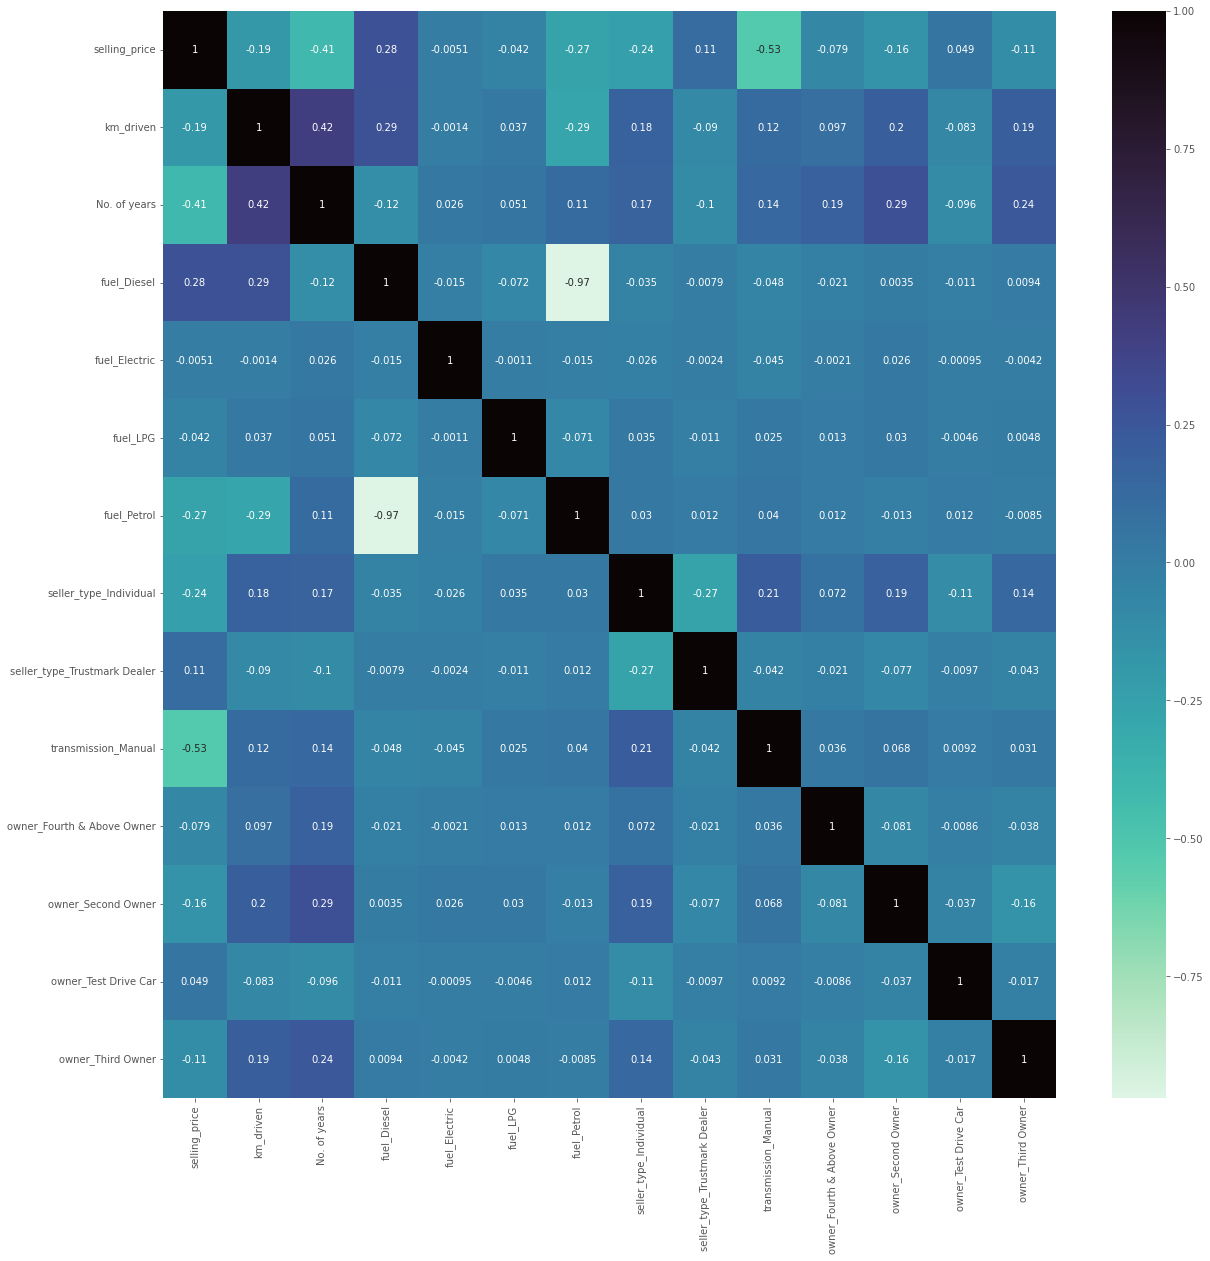

In [15]:
corr = df_model.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

## Predict price

In [16]:
cor_target = abs(corr["selling_price"])
relevant_features = cor_target[cor_target>0.2]
names = [index for index, value in relevant_features.iteritems()]
names.remove('selling_price')
print(names)

['No. of years', 'fuel_Diesel', 'fuel_Petrol', 'seller_type_Individual', 'transmission_Manual']


In [17]:
X = df_model[names]
y = df_model['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
model = RandomForestRegressor(n_estimators=500, n_jobs=-1)

model = model.fit(X_train, y_train)
prediction = model.predict(X_test)

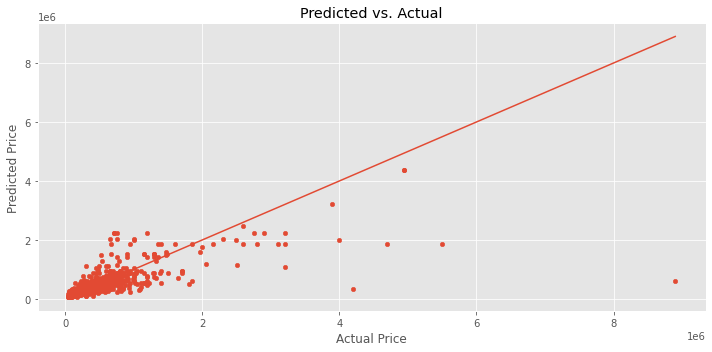

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, prediction, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()